In [1]:
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")
import platform

%load_ext autoreload
%autoreload 2

In [2]:
from kalman_steps import *
from helpers import *

In [3]:
TIME_INTERVAL_TO_USE = "1s"
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# Convert the time interval string to a pandas Timedelta object
time_interval = pd.Timedelta(TIME_INTERVAL_TO_USE)
# Extract the total seconds from the Timedelta object and convert to float
time_interval_in_seconds = time_interval.total_seconds()
print(f"Time interval in seconds: {time_interval_in_seconds}")

Time interval in seconds: 1.0


In [5]:
file_identifiers = load_identifiers();
pick_ident = "kyzikos_run"
file_name = file_identifiers[pick_ident]["file_name"]
file_ident = file_identifiers[pick_ident]
additional_run_info = {}

Identifiers:
0: basak run 02 (run of basak at 31st.))
1: basak run 01 (run of basak at 30th.))
2: my run 01 (my run on the xth of y at xx:yy))
3: my run 02 (my run on the xth of y at xx:yy))
4: kyzikos_run (kyzikos_2023_30K))


In [6]:
gpx_obj, segment = step_01_load_data(file_name)

/home/doga/GitHubUbuntU/gps_data_with_python/gpx/activity_11238893125_basak02.gpx
/home/doga/GitHubUbuntU/gps_data_with_python/gpx/activity_11238879870.gpx
/home/doga/GitHubUbuntU/gps_data_with_python/gpx/3-laender-giro_cleaned.gpx
/home/doga/GitHubUbuntU/gps_data_with_python/gpx/hh_marathon.gpx
/home/doga/GitHubUbuntU/gps_data_with_python/gpx/3-laender-giro.gpx
/home/doga/GitHubUbuntU/gps_data_with_python/gpx/activity_11212422262.gpx
/home/doga/GitHubUbuntU/gps_data_with_python/gpx/kyzikos_2023_30K.gpx
/home/doga/GitHubUbuntU/gps_data_with_python/gpx/activity_11231936537_basak01.gpx
Loading file: /home/doga/GitHubUbuntU/gps_data_with_python/gpx/kyzikos_2023_30K.gpx
num of tracks=1


In [7]:
print_known_info(file_ident, ["total_elevation"])
segment.get_uphill_downhill()

unknown total_elevation


UphillDownhill(uphill=0.0, downhill=0.0)

In [30]:
coords = pd.DataFrame([{'lat': p.latitude, 
                        'lon': p.longitude, 
                        'ele': p.elevation,
                        'time': p.time} for p in segment.points])
coords.set_index('time', drop=True, inplace=True)
coords.head()

,lat,lon,ele
time,,,
None,40.396427,27.790300,0.0
None,40.396520,27.789635,0.0
None,40.396566,27.789225,0.0
None,40.396617,27.788834,0.0
None,40.396659,27.788506,0.0


In [58]:
len(coords)

2080

Text(0.5, 1.0, 'Track')

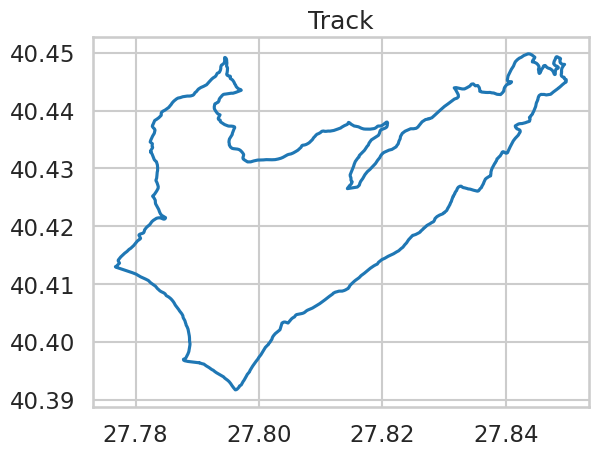

In [31]:
plt.plot(coords['lon'].values, coords['lat'].values)
plt.title("Track")

In [34]:
for point in segment.points:
    point.elevation = None

In [36]:
import srtm
elevation_data = srtm.get_data()
elevation_data.add_elevations(gpx_obj, smooth=True)

4 2884802


In [38]:
coords['new_ele'] = [p.elevation for p in gpx_obj.tracks[0].segments[0].points]

In [39]:
segment.get_uphill_downhill()

UphillDownhill(uphill=1023.0945425624864, downhill=1023.0945425624876)

<Axes: title={'center': 'Elevation'}, xlabel='time'>

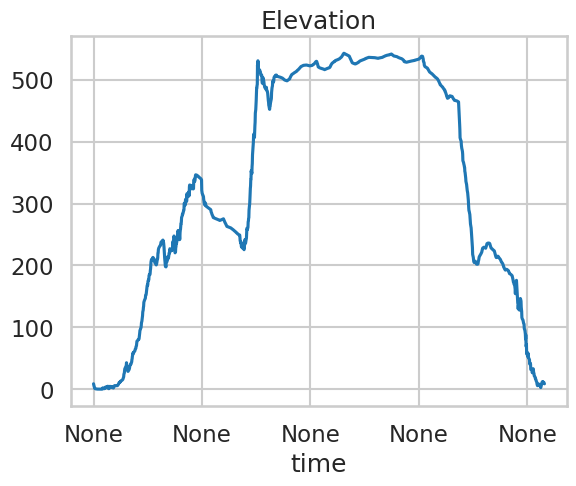

In [40]:
coords['new_ele'].plot(title='Elevation')

In [41]:
coords.head()

,lat,lon,ele,new_ele
time,,,,
None,40.396427,27.790300,0.0,9.000000
None,40.396520,27.789635,0.0,7.333946
None,40.396566,27.789225,0.0,6.518383
None,40.396617,27.788834,0.0,4.403510
None,40.396659,27.788506,0.0,3.749080


In [57]:
_, distance_vincenty = calc_speed_distance_vincent(segment, verbose=False)
print(distance_vincenty[0:3])
print(distance_vincenty[-3:])
print(len(distance_vincenty))

[ 0.         57.44881424 35.15763725]
[43.51520061 27.16009778 35.1413731 ]
2080


In [59]:
sum(abs(coords['new_ele'][1:-1]-coords['new_ele'][0:-2]))/2

1181.1161006581403

In [53]:
len(distance_vincenty)

2080

In [104]:
elev_acquired=coords['new_ele'][1:]-coords['new_ele'][0:-1]
elev_acquired = elev_acquired.reset_index(drop=True)
elev_values = elev_acquired.tolist()
print(len(elev_acquired))

2079


In [113]:
dist_acquired = distance_vincenty[1:]
angles = np.arctan2(elev_values, dist_acquired)

In [114]:
dist_acc = np.cumsum(dist_acquired)
elev_acc = np.cumsum(elev_values)

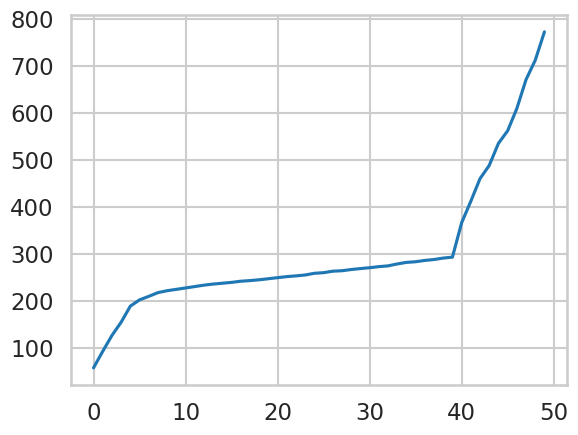

In [115]:
plt.plot(dist_acc[:50])

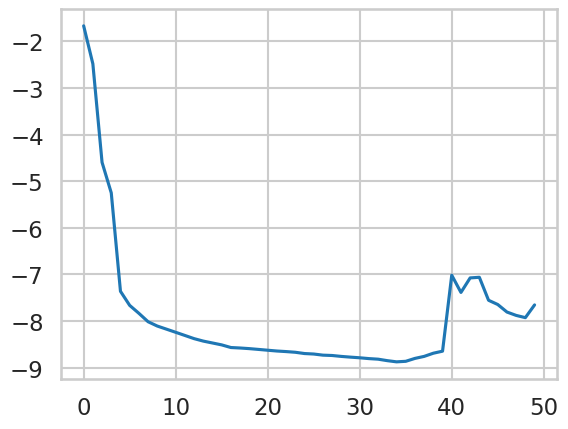

In [116]:
plt.plot(elev_acc[0:50])

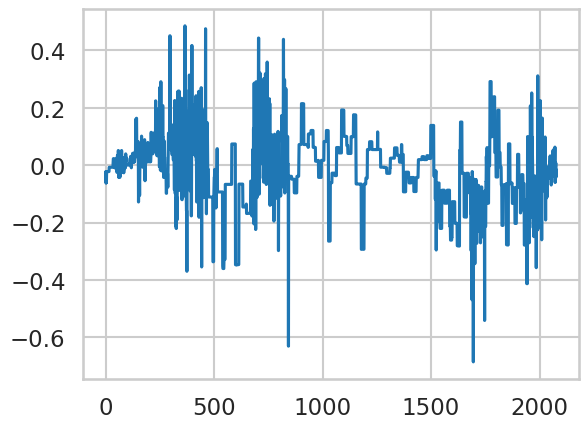

In [118]:
plt.plot(angles)

In [109]:
np.column_stack((dist_acc[0:50], elev_acc[0:50]))

array([[ 57.44881424,  -1.66605447],
       [ 92.60645149,  -2.48161728],
       [126.2964046 ,  -4.5964896 ],
       [154.50709853,  -5.25091966],
       [188.69338975,  -7.36277591],
       [201.97597878,  -7.66534481],
       [209.44900662,  -7.83566027],
       [217.37826457,  -8.0163118 ],
       [221.43964426,  -8.10910986],
       [224.36505613,  -8.1759523 ],
       [227.31106598,  -8.24326538],
       [230.27789214,  -8.31105409],
       [233.26575607,  -8.37932349],
       [235.57969646,  -8.43220968],
       [237.35539183,  -8.47278857],
       [239.13870064,  -8.51354145],
       [241.61882387,  -8.5701176 ],
       [242.95221882,  -8.58033782],
       [244.7109043 ,  -8.59381348],
       [246.90982951,  -8.61065978],
       [249.1879158 ,  -8.62812587],
       [251.39946446,  -8.64510657],
       [252.97612212,  -8.65720887],
       [254.89380787,  -8.6719185 ],
       [258.45787288,  -8.69922767],
       [259.81658281,  -8.70964195],
       [262.96269195,  -8.73375169],
 

In [112]:

print(np.column_stack((dist_acquired[0:50], elev_values[0:50],angles[0:50])))

[[ 5.74488142e+01 -1.66605447e+00 -2.89925502e-02]
 [ 3.51576373e+01 -8.15562812e-01 -2.31931561e-02]
 [ 3.36899531e+01 -2.11487232e+00 -6.26923070e-02]
 [ 2.82106939e+01 -6.54430063e-01 -2.31937828e-02]
 [ 3.41862912e+01 -2.11185624e+00 -6.16965433e-02]
 [ 1.32825890e+01 -3.02568902e-01 -2.27754230e-02]
 [ 7.47302784e+00 -1.70315464e-01 -2.27867457e-02]
 [ 7.92925795e+00 -1.80651530e-01 -2.27789642e-02]
 [ 4.06137970e+00 -9.27980545e-02 -2.28449240e-02]
 [ 2.92541187e+00 -6.68424404e-02 -2.28449240e-02]
 [ 2.94600984e+00 -6.73130811e-02 -2.28449239e-02]
 [ 2.96682616e+00 -6.77887108e-02 -2.28449238e-02]
 [ 2.98786393e+00 -6.82694003e-02 -2.28449237e-02]
 [ 2.31394038e+00 -5.28861888e-02 -2.28514889e-02]
 [ 1.77569537e+00 -4.05788911e-02 -2.28484177e-02]
 [ 1.78330882e+00 -4.07528759e-02 -2.28484173e-02]
 [ 2.48012322e+00 -5.65761554e-02 -2.28078767e-02]
 [ 1.33339496e+00 -1.02202198e-02 -7.66466049e-03]
 [ 1.75868547e+00 -1.34756540e-02 -7.66219458e-03]
 [ 2.19892521e+00 -1.68462999e-